In [ ]:
## Import libraries
## Data handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
import re
import nltk
nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
### Lemmatization
from nltk.stem import WordNetLemmatizer
## TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer
## Combining SMOTE and Edited Nearest Neighbors sampling for imbalanced classification
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
# Model performance
## Performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

#Load the data

In [ ]:
from google.colab import files
file= files.upload()

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv


In [ ]:
df= pd.read_csv('Womens Clothing E-Commerce Reviews.csv',engine='python')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,reviews_didPurchase
0,0.0,767.0,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates,NaN
1,1.0,1080.0,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses,True
2,2.0,1077.0,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses,True
3,3.0,1049.0,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants,False
4,4.0,847.0,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses,False


In [ ]:
df.shape        #The dataset has 30000 records and 12 columns.

(30000, 12)

In [ ]:
# Dropping unwanted columns

df.drop(['Unnamed: 0', 'Clothing ID', 'Title'], axis=1, inplace=True)    #We are dropping these features because they hold very less significance to sentiment analysis of the review.

In [ ]:
df.info()            #The dataset has 4 integer and 4 object columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      23486 non-null  float64
 1   Review Text              22641 non-null  object 
 2   Rating                   23486 non-null  float64
 3   Recommended IND          23486 non-null  float64
 4   Positive Feedback Count  23486 non-null  float64
 5   Division Name            23472 non-null  object 
 6   Department Name          23472 non-null  object 
 7   Class Name               23472 non-null  object 
 8   reviews_didPurchase      15932 non-null  object 
dtypes: float64(4), object(5)
memory usage: 2.1+ MB


In [ ]:
# Checking for null values
df.isnull().sum()

Age                         6514
Review Text                 7359
Rating                      6514
Recommended IND             6514
Positive Feedback Count     6514
Division Name               6528
Department Name             6528
Class Name                  6528
reviews_didPurchase        14068
dtype: int64

In [ ]:
# Renaming columns

df.rename(columns={'Review Text':'Review',
                   'Recommended IND':'Recommended',
                   'Positive Feedback Count':'PositiveFeedback',
                   'Division Name':'Division',
                   'Department Name':'Department',
                   'Class Name':'Class'}, inplace=True)

In [ ]:
#removing nan/null from username
df = df[~df.Review.isnull()]

In [ ]:
df = df.dropna()

In [ ]:
# Checking if any duplicate records are present

duplicate=df[df.duplicated()]                   #There are 3 duplicate records.
duplicate

,Age,Review,Rating,Recommended,PositiveFeedback,Division,Department,Class,reviews_didPurchase
13354,26.0,Perfect fit and i've gotten so many compliment...,5.0,1.0,0.0,Initmates,Intimate,Swim,False
14275,43.0,I bought this shirt at the store and after goi...,5.0,1.0,0.0,General Petite,Tops,Knits,False


In [ ]:
# Removing duplicate records

df.drop_duplicates(inplace=True)

In [ ]:
# Again check if any duplicate records are left

duplicate = df[df.duplicated()]
duplicate

,Age,Review,Rating,Recommended,PositiveFeedback,Division,Department,Class,reviews_didPurchase


In [ ]:
df.describe()

,Age,Rating,Recommended,PositiveFeedback
count,14024.000000,14024.000000,14024.000000,14024.000000
mean,43.246007,4.187250,0.818026,2.599044
std,12.362092,1.111943,0.385837,5.625380
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


In [ ]:
# Check the value of recommendation index
df['Recommended'].value_counts()                           #There are much more positive cases than negative cases. The data is imbalanced.

1.0    11472
0.0     2552
Name: Recommended, dtype: int64

#Data Visualization

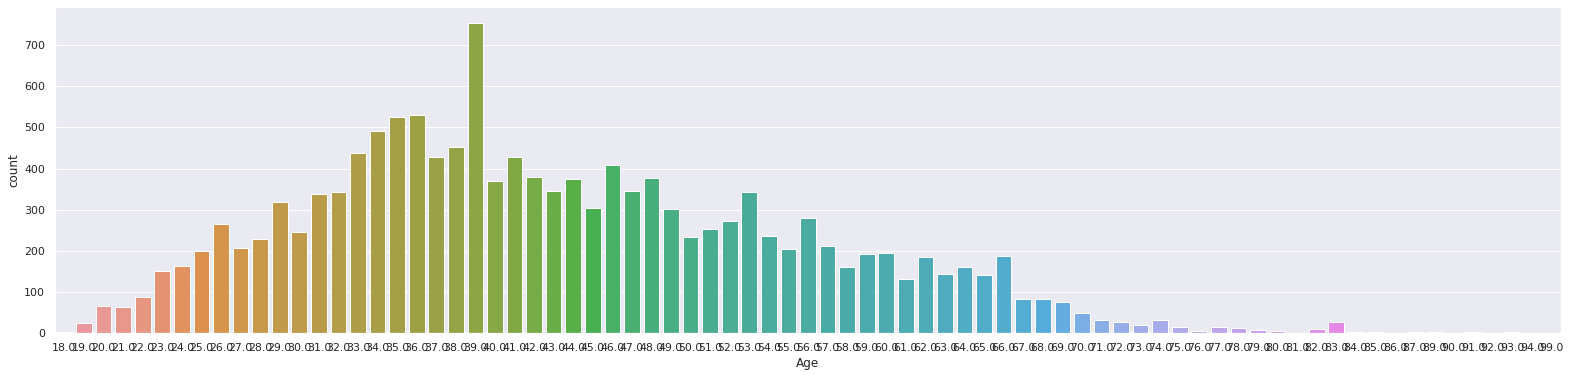

In [ ]:
#Visualize using count plot
plt.figure(figsize = (27,6))
sns.countplot(x = 'Age', data = df)
plt.show()

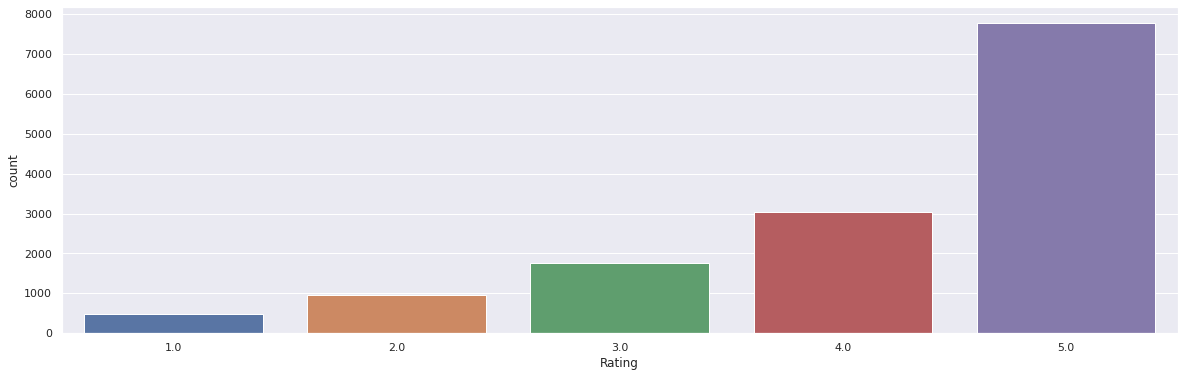

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Rating', data = df)
plt.show()



Fake Reviews Provided by User:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



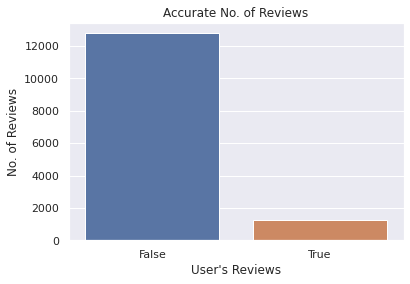

In [ ]:
ax_plt = sns.countplot(df['reviews_didPurchase'])
ax_plt.set_xlabel(xlabel="User's Reviews",fontsize=12)
ax_plt.set_ylabel(ylabel='No. of Reviews',fontsize=12)
ax_plt.axes.set_title('Accurate No. of Reviews',fontsize=12)
ax_plt.tick_params(labelsize=11)

True reviews are less in number and as you can see poeple who didn't even purchase the product has provided reviews these are all fake reviews which are much higher than those who have purchased and provided the review.

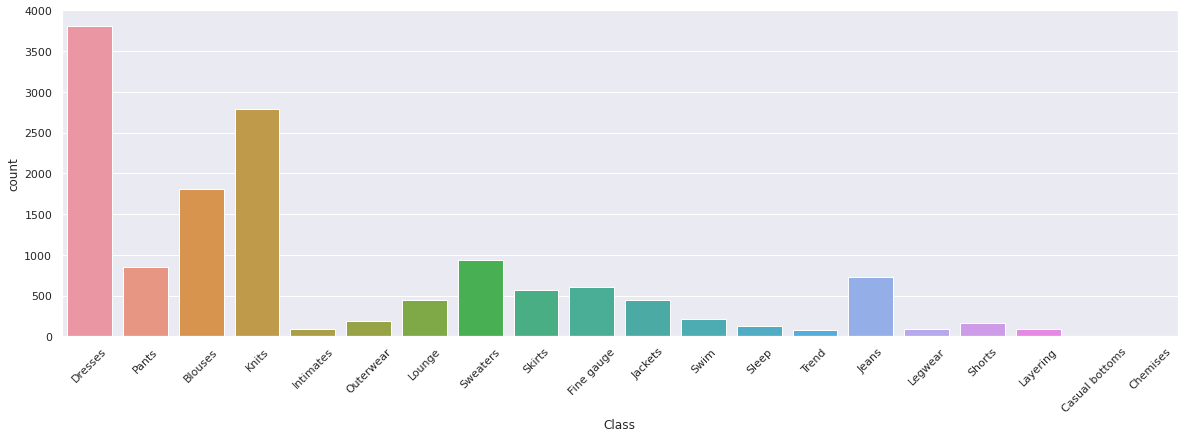

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Class', data = df)
plt.xticks(rotation = 45)
plt.show()

#Dresses, Knits and Blouses are bought the most by women

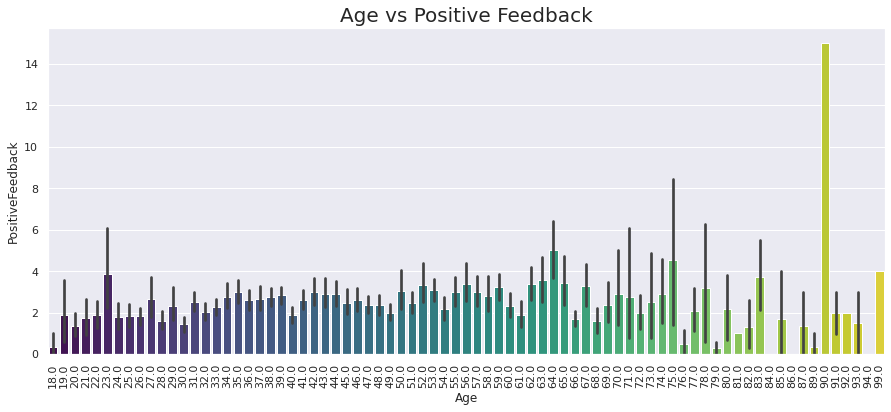

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x ='Age',y= 'PositiveFeedback',data = df, palette = 'viridis')
plt.title('Age vs Positive Feedback', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

#There's no noteable relation between Age and Positive Feedback, excluding some outliers.

In [ ]:
# Distribution of Rating and Age

px.histogram(df, x='Age', color='Rating', barmode='stack', title='Distribution of Rating and Age')  #People in their 30s are more likely to give rating.


###Cleaning the text for visualization of polarity

In [ ]:
import string
string.punctuation
def remove_punctuation(text):

    no_punct=[words for words in text if words and words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['Review']=df['Review'].apply(lambda x: remove_punctuation(x))
df.head()

,Age,Review,Rating,Recommended,PositiveFeedback,Division,Department,Class,reviews_didPurchase
1,34.0,Love this dress its sooo pretty i happened t...,5.0,1.0,4.0,General,Dresses,Dresses,True
2,60.0,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses,True
3,50.0,I love love love this jumpsuit its fun flirty ...,5.0,1.0,0.0,General Petite,Bottoms,Pants,False
4,47.0,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses,False
5,49.0,I love tracy reese dresses but this one is not...,2.0,0.0,4.0,General,Dresses,Dresses,False


In [ ]:
!pip install TextBlob
from textblob import *

df['polarity'] = df['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
df['polarity']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1        0.318750
2        0.076392
3        0.500000
4        0.393750
5        0.178750
           ...   
22873    0.032292
22874    0.099242
22875    0.264413
22876    0.149679
22877    0.248148
Name: polarity, Length: 14024, dtype: float64

In [ ]:
import plotly.express as px
px.histogram(df, x = 'polarity',color="Rating", opacity = 0.5)

Reviews with positive polarity

In [ ]:
ex = df.loc[df.polarity == 1,['Review']].sample(3).values
for i in ex:
    print(i[0])

This is the perfect holiday dress my best purchase of the season
This is awesome multiseason dress
This is a wonderful style


Reviews with negative polarity

In [ ]:
ex = df.loc[df.polarity < 0,['Review']].sample(3).values
for i in ex:
    print(i[0])

I got the pink version to layer with spring clothes i always wear a medium but sized down to a small based on the other review the seams are very flattering the material is very soft on sale the price is reasonable
I really wanted this they had two size small in my local retailer both were damaged so disappointing i dont want to pay shipping for one that hopefully isnt damaged in the last year ive had multiple quality control issues with retailer makes me gun shy not sure im getting what i pay for anymore
I wanted this sweater to work but sadly it failed first the pink was way to sheer for my liking the sheerness caused a weird color overlap on the stomach area then the band at the bottom was too tight causing a weird ballooning affect a shirt underneath could work but it takes away from the beauty of the knit the soft pink is gorgeous but not good for medium to light skinned folks


Reviews with neutral polarity

In [ ]:
ex = df.loc[df.polarity == 0.5,['Review']].sample(3).values
for i in ex:
    print(i[0])

Wish i would have bought them in every color love
I ordered two colors of these in 25p  i am keeping them because they feel wonderful on but they definitely have to be hemmed i measured the inseam on both pairs to be closer to 29 inches  29 inches is not a petite length
Love love love this sweater lots of compliments as well 


Polarity Pie-Chart

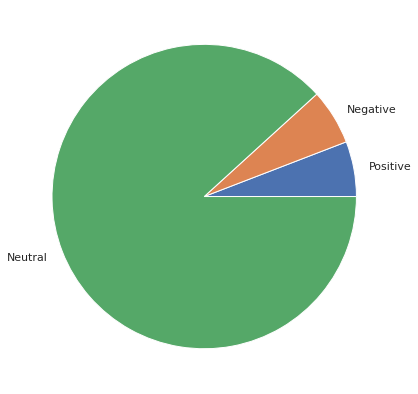

In [ ]:
negative = (len(df.loc[df.polarity < 0, ['Review']].values)/len(df))*100
positive = (len(df.loc[df.polarity > 0.5, ['Review']].values)/len(df))*100
neutral = len(df.loc[df.polarity >0 ,['Review']].values) - len(df.loc[df.polarity >0.5 ,['Review']].values)
neutral = neutral/len(df)*100
plt.figure(figsize =(10, 7))
plt.pie([positive,negative,neutral], labels = ['Positive','Negative','Neutral'])
plt.show()

Visualizing Top 10 POS Tagging

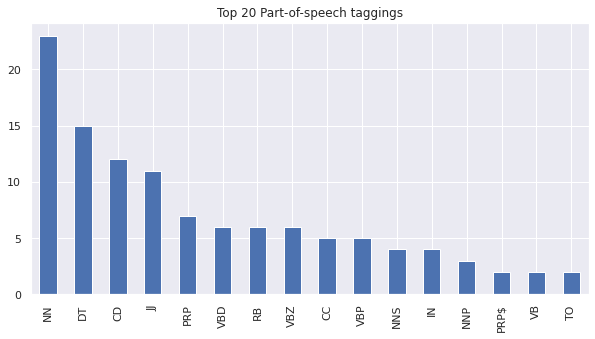

In [ ]:
blob= TextBlob(str(df['Review']))
pos = pd.DataFrame(blob.tags,columns =['word','pos'])
pos1 = pos.pos.value_counts()[:20]
plt.figure(figsize = (10,5))
pos1.plot(kind='bar',title ='Top 20 Part-of-speech taggings')

#Correlation of fetaures using Heatmaps

In [ ]:
df['review_len'] = df['Review'].astype(str).apply(len)
y = df['Recommended']
X = df.drop(columns = 'Recommended')

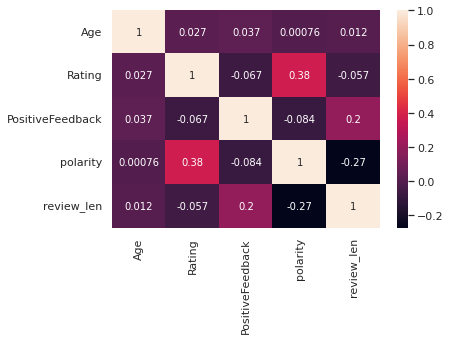

In [ ]:
sns.heatmap(X.corr(), annot = True )


Statistical Description

In [ ]:
class1 = []
for i in X.polarity:
    if float(i)>=0.0:
        class1.append(1)

    elif float(i)<0.0:
        class1.append(0)
X['sentiment'] = class1

X.groupby(X['sentiment']).describe().T

sentiment                          0             1
Age              count  8.240000e+02  13200.000000
                 mean   4.349879e+01     43.230227
                 std    1.225171e+01     12.369238
                 min    2.000000e+01     18.000000
                 25%    3.475000e+01     34.000000
                 50%    4.100000e+01     41.000000
                 75%    5.200000e+01     52.000000
                 max    9.100000e+01     99.000000
Rating           count  8.240000e+02  13200.000000
                 mean   2.952670e+00      4.264318
                 std    1.353253e+00      1.048010
                 min    1.000000e+00      1.000000
                 25%    2.000000e+00      4.000000
                 50%    3.000000e+00      5.000000
                 75%    4.000000e+00      5.000000
                 max    5.000000e+00      5.000000
PositiveFeedback count  8.240000e+02  13200.000000
                 mean   3.233010e+00      2.559470
                 std    6.893326e+00      5.534519
                 min    0.000000e+00      0.000000
                 25%    0.000000e+00      0.000000
                 50%    1.000000e+00      1.000000
                 75%    3.000000e+00      3.000000
                 max    1.080000e+02    122.000000
polarity         count  8.240000e+02  13200.000000
                 mean  -9.447244e-02      0.261536
                 std    1.061774e-01      0.149617
                 min   -9.750000e-01      0.000000
                 25%   -1.252480e-01      0.154854
                 50%   -6.250000e-02      0.244363
                 75%   -2.866703e-02      0.348279
                 max   -1.734723e-18      1.000000
review_len       count  8.240000e+02  13200.000000
                 mean   2.852779e+02    299.983182
                 std    1.371037e+02    139.630233
                 min    1.000000e+01      9.000000
                 25%    1.700000e+02    180.750000
                 50%    2.740000e+02    293.000000
                 75%    4.082500e+02    447.000000
                 max    4.960000e+02    498.000000

In [ ]:
df_pos = df.groupby('Recommended')['PositiveFeedback'].sum()   #45,438 customers who gave a positive review recommend the product whereas 14,114 customers who gave review didn't recommend it.
df_pos

Recommended
0.0     8596.0
1.0    27853.0
Name: PositiveFeedback, dtype: float64

In [ ]:
df_rat = df.groupby('Recommended')['Rating'].mean()  #The mean rating for products which were recommended is 4.59 and for products which weren't recommended is 2.30.
df_rat

Recommended
0.0    2.322884
1.0    4.601987
Name: Rating, dtype: float64

In [ ]:
df_ratp = df.groupby('Rating')['PositiveFeedback'].sum()
df_ratp                            #Maximum positive feedback is for products with rating 4 followed by products with rating 5

Rating
1.0     1856.0
2.0     3189.0
3.0     5488.0
4.0     7519.0
5.0    18397.0
Name: PositiveFeedback, dtype: float64

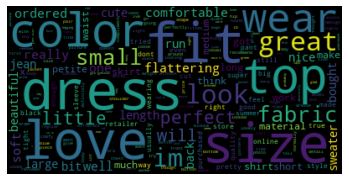

In [ ]:
# Wordcloud of Review in Recommended product

# Cleaned dataframe of Recommended
df_true = df[df.Recommended == 1]

text_true = " ".join(txt for txt in df_true['Review'])

text_cloud = WordCloud(collocations=False, background_color='black').generate(text_true)
plt.axis("off")
plt.imshow(text_cloud, interpolation='bilinear')

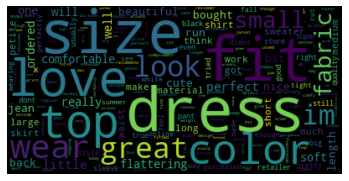

In [ ]:
# Wordcloud of Review in not Recommended product

# Cleaned dataframe of Recommended
df_false = df[df.Recommended == 0]

text_true = " ".join(txt for txt in df_true['Review'])

text_cloud = WordCloud(collocations=False, background_color='black').generate(text_true)
plt.axis("off")
plt.imshow(text_cloud, interpolation='bilinear')

In [ ]:
# Distribution of Sentiment Polarity based on Recommendation

x1 = df[df['Recommended']==1]['polarity']
x0 = df[df['Recommended']==0]['polarity']

trace1 = go.Histogram(x=x0, name='Not Recommended', opacity=0.6)
trace0 = go.Histogram(x=x1, name='Recommended', opacity=0.8)

data = [trace0,trace1]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment Polarity of Reviews Based On The Recommendation ')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [ ]:
# Distribution of Sentiment Polarity based on Rating

r1 = df[df['Rating'] == 1]['polarity']
r2 = df[df['Rating'] == 2]['polarity']
r3 = df[df['Rating'] == 3]['polarity']
r4 = df[df['Rating'] == 4]['polarity']
r5 = df[df['Rating'] == 5]['polarity']

rat1 = go.Histogram(x=r1, name='1', opacity=0.5)
rat2 = go.Histogram(x=r2, name='2', opacity=0.6)
rat3 = go.Histogram(x=r3, name='3', opacity=0.7)
rat4 = go.Histogram(x=r4, name='4', opacity=0.8)
rat5 = go.Histogram(x=r5, name='5', opacity=0.9)

data = [rat1, rat2, rat3, rat4, rat5]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment Polarity of Reviews Based On The Rating')
fig = go.Figure(data=data, layout=layout)
fig.show()

##Preprocessing of Text Data

Delete Stopwords

In [ ]:
# Set stopwords and lemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
# Define a function to delete stopwords
def review_to_words(raw_review):
    letters_only = re.sub("[^a-zA-Z]", " ",str(raw_review))
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

In [ ]:
# Apply the function to delete stopwords from product review text
df['Cleaned_Review'] = df['Review'].apply(lambda x: review_to_words(x))

# Show the first five rows
df[['Review', 'Cleaned_Review']].head()

,Review,Cleaned_Review
1,Love this dress its sooo pretty i happened t...,love dress sooo pretty happened find store im ...
2,I had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...
3,I love love love this jumpsuit its fun flirty ...,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...
5,I love tracy reese dresses but this one is not...,love tracy reese dresses one petite feet tall ...


Tokenization and Lemmatization

In [ ]:
# Initiate lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
# Define a function to perform tokenization
def tokenize_and_lemmatize(text):

    # Tokenize by sentence, then by word
    tokens = [y for x in nltk.sent_tokenize(text) for y in nltk.word_tokenize(x)]

    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]

    # Stem the filtered_tokens
    lemmas = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in filtered_tokens]

    return lemmas

In [ ]:
# Apply tokenization and lemmatization to an example sentence.
words_lemmatized = tokenize_and_lemmatize("I was born in Japan on September 6th, and it is also my friend's birthday.")
print(words_lemmatized)                                                          #Tokenization and lemmatization leds to separated but meaningful words.

['I', 'be', 'bear', 'in', 'Japan', 'on', 'September', '6th', 'and', 'it', 'be', 'also', 'my', 'friend', "'s", 'birthday']


#Feature Extraction

In [ ]:
##using TF-IDF vectorizer using the parameters to get 100  features.
vectorizer = TfidfVectorizer(stop_words='english', max_features=100, max_df=0.9, min_df=7, binary=True,
                                   ngram_range=(1,2))
X_train_tfidf =vectorizer.fit_transform(df['Cleaned_Review'])

y= df['Recommended']

In [ ]:
print(vectorizer.get_feature_names_out())

['beautiful' 'better' 'big' 'bit' 'black' 'blue' 'body' 'bought' 'casual'
 'color' 'colors' 'comfortable' 'cut' 'cute' 'definitely' 'design' 'didnt'
 'dont' 'dress' 'fabric' 'fall' 'feel' 'fit' 'fits' 'flattering' 'going'
 'good' 'gorgeous' 'got' 'great' 'im' 'jeans' 'large' 'lbs' 'length'
 'like' 'little' 'long' 'look' 'looked' 'looking' 'looks' 'loose' 'love'
 'loved' 'lovely' 'make' 'makes' 'material' 'medium' 'model' 'nice'
 'online' 'ordered' 'pants' 'perfect' 'perfectly' 'person' 'petite'
 'pretty' 'price' 'purchased' 'quality' 'really' 'recommend' 'regular'
 'retailer' 'right' 'runs' 'sale' 'saw' 'shirt' 'short' 'size' 'skirt'
 'sleeves' 'small' 'soft' 'store' 'style' 'summer' 'super' 'sweater'
 'think' 'thought' 'tight' 'time' 'tried' 'true' 'true size' 'try'
 'usually' 'waist' 'way' 'wear' 'wearing' 'white' 'work' 'worn' 'xs']


To Vectorize the data, using TF-IDF vectorizer method to dervie the features from the textual data

#Create vectorized training data and test data

In [ ]:
## Splitting train and test
from sklearn.model_selection import train_test_split

# Split data into train data and test data
train_data, test_data = train_test_split(df, train_size=0.7, random_state=0)

# Split train data into vectorized X and y
X_train = vectorizer.fit_transform(train_data['Cleaned_Review']).toarray()
y_train = train_data['Recommended']

# Split test data into vectorized X and y
X_test = vectorizer.transform(test_data['Cleaned_Review'])
y_test = test_data['Recommended']

In [ ]:
# Rebalance the Data with SMOTE-ENN
X_train, y_train=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority')).fit_resample(X_train,y_train)

y_train.value_counts()


1.0    8009
0.0    7823
Name: Recommended, dtype: int64


#Model Building

In [ ]:
from sklearn import metrics

In [ ]:
class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test


    def train_model(self):
        self.model.fit(self.x_train,self.y_train)
        return self.model.predict(self.x_test)

    def evaluate_model(self, y_pred_class):
        print("\n")
        print("*"*30)
        self.result_metrics = self.evaluate_metrics(y_pred_class)
        print("*"*30)
        print("\n")

        self.classification_report(y_pred_class)
        print("*"*30)
        print("\n")
        self.confusion_matrix(y_pred_class)

        print("*"*30)
        print("\n")

        metrics.plot_roc_curve(self.model, self.x_test, self.y_test)

        return self.result_metrics

    def evaluate_metrics(self, y_pred_class):
        result_metrics = []
        accuracy = metrics.accuracy_score(self.y_test, y_pred_class)
        precision = metrics.precision_score(self.y_test, y_pred_class)
        recall = metrics.recall_score(self.y_test, y_pred_class)
        f1score = metrics.f1_score(self.y_test, y_pred_class)
        y_pred_prob = self.model.predict_proba(self.x_test)[:,1]
        roc_auc = metrics.roc_auc_score(self.y_test, y_pred_prob)

        print(f"Accuracy is : {accuracy*100:.1f}%")
        print(f"Precision is : {precision*100:.1f}%")
        print(f"Recall is : {recall*100:.1f}%")
        print(f"F1 Score is : {f1score*100:.1f}%")
        print(f"Roc-Auc Score is:{roc_auc*100:.1f}%")

        result_metrics.append(accuracy)
        result_metrics.append(precision)
        result_metrics.append(recall)
        result_metrics.append(f1score)
        result_metrics.append(roc_auc)
        return result_metrics

    def confusion_matrix(self, y_pred_class):
        confusion_matrix = metrics.confusion_matrix(self.y_test, y_pred_class)
        self.plot_confusion_matrix(confusion_matrix,[0,1])


    def plot_confusion_matrix(self, data, labels):
        sns.set(color_codes=True)
        plt.title("Confusion Matrix")
        ax = sns.heatmap(data/np.sum(data), annot=True, cmap="Blues", fmt=".2%")

        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)

        ax.set(ylabel="True Values", xlabel="Predicted Values")
        plt.show()

    def classification_report(self, y_pred_class):
        print(metrics.classification_report(self.y_test, y_pred_class))



    def plot_confusion_matrix(self, data, labels):
        sns.set(color_codes=True)
        plt.title("Confusion Matrix")
        ax = sns.heatmap(data/np.sum(data), annot=True, cmap="Blues", fmt=".2%")


###Classification

Logistic Regression

In [ ]:
# Build the Logistic Regression model.
lr = LogisticRegression(random_state=42, max_iter=100,solver='liblinear', class_weight="balanced")
lr_modebuilder = ModelBuilder(lr, X_train, X_test, y_train, y_test)



******************************
Accuracy is : 78.0%
Precision is : 92.9%
Recall is : 79.3%
F1 Score is : 85.6%
Roc-Auc Score is:83.6%
******************************


              precision    recall  f1-score   support

         0.0       0.43      0.72      0.54       745
         1.0       0.93      0.79      0.86      3463

    accuracy                           0.78      4208
   macro avg       0.68      0.76      0.70      4208
weighted avg       0.84      0.78      0.80      4208

******************************


******************************




/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



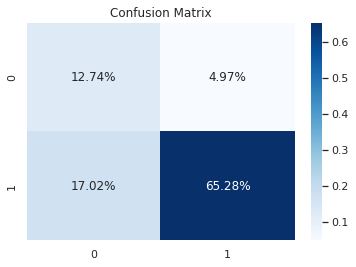

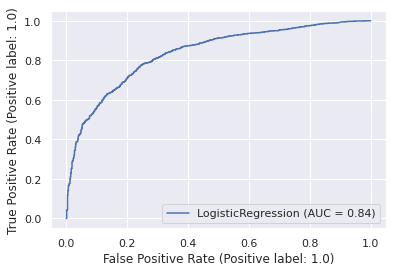

In [ ]:
# Train and Predict the Test Labels
y_pred_class  = lr_modebuilder.train_model()
lr_metrics = lr_modebuilder.evaluate_model(y_pred_class)

Naive Bayes Classification

In [ ]:
mnb = MultinomialNB(alpha=1.0)
mnb_modebuilder = ModelBuilder(mnb, X_train, X_test, y_train, y_test)



******************************
Accuracy is : 75.5%
Precision is : 92.7%
Recall is : 76.2%
F1 Score is : 83.7%
Roc-Auc Score is:82.2%
******************************


              precision    recall  f1-score   support

         0.0       0.39      0.72      0.51       745
         1.0       0.93      0.76      0.84      3463

    accuracy                           0.75      4208
   macro avg       0.66      0.74      0.67      4208
weighted avg       0.83      0.75      0.78      4208

******************************


******************************




/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



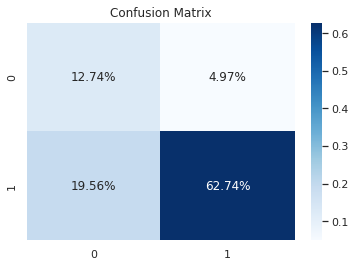

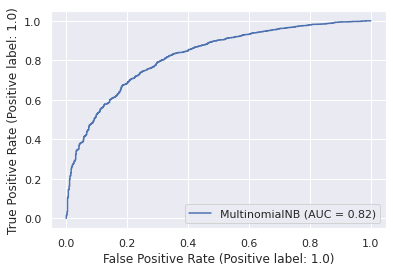

In [ ]:
# Train and Predict the Test Labels
y_pred_class  = mnb_modebuilder.train_model()
nb_metrics = mnb_modebuilder.evaluate_model(y_pred_class)

Decision Tree



******************************
Accuracy is : 72.7%
Precision is : 91.0%
Recall is : 74.2%
F1 Score is : 81.7%
Roc-Auc Score is:73.3%
******************************


              precision    recall  f1-score   support

         0.0       0.35      0.66      0.46       745
         1.0       0.91      0.74      0.82      3463

    accuracy                           0.73      4208
   macro avg       0.63      0.70      0.64      4208
weighted avg       0.81      0.73      0.75      4208

******************************


******************************




/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



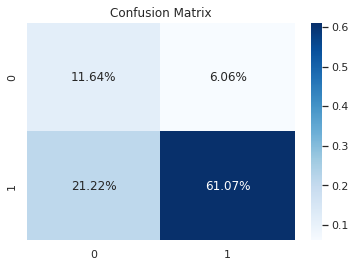

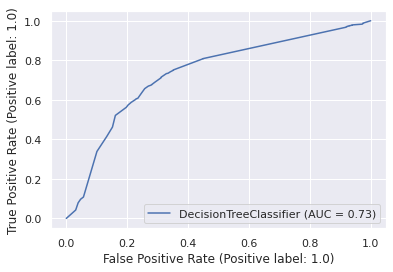

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10)

dt_modelbuilder = ModelBuilder(dt, X_train, X_test, y_train, y_test)

y_pred_class  = dt_modelbuilder.train_model()
dt_metrics_cv = dt_modelbuilder.evaluate_model(y_pred_class)



In [ ]:
from sklearn.metrics import accuracy_score,classification_report
%pip install scikit-plot
import scikitplot as skplt
from scikitplot.metrics import plot_confusion_matrix, plot_roc


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


SVM

In [ ]:
# Initiate and train the model
svm = LinearSVC().fit(X_train, y_train)

# Make prediction
svm_pred = svm.predict(X_test)

# Show model performance
print("Accuracy:{:.3f}". format(accuracy_score(y_test, svm_pred)))
print("Precision:{:.3f}". format(precision_score(y_test, svm_pred)))
print("Recall:{:.3f}". format(recall_score(y_test, svm_pred)))
print("F1 Score:{:.3f}". format(f1_score(y_test, svm_pred)))
print("ROC AUC Score:{:.3f}". format(roc_auc_score(y_test, svm_pred)))

Accuracy:0.784
Precision:0.929
Recall:0.798
F1 Score:0.859
ROC AUC Score:0.758


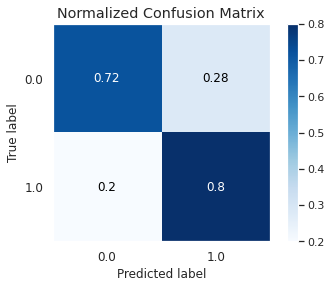

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, svm_pred, normalize=True)
plt.show()

In [ ]:
# Create a dictionary of all models.
models = [{'label': 'Logistic Regression','model': lr,},
          {'label': 'Naive Bayes','model': mnb,},
          {'label': 'SVM','model': svm,},
          {'label': 'DecisionTreeClassifier','model': dt,}
         ]

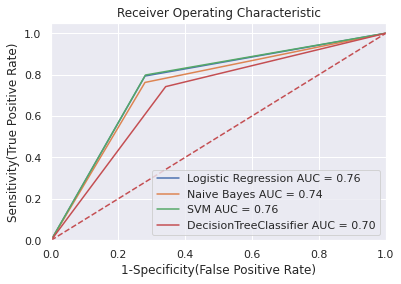

In [ ]:
## ROC curve
from sklearn.metrics import roc_curve,auc
from sklearn import metrics
%matplotlib inline
# Plot the ROC curve.
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (m['label'], roc_auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
plt.show()